# NASA-FIRMS Boxplots (Daily Values by Month)
---
Dataset to be analyzed was retreived from NRT VIIRS 375 m Active Fire product VNP14IMGT distributed from NASA FIRMS>

Please s`ee NASA-FIRMS_fetch.ip`ynb for data scraping a`nd NASA_FIRMS_merge.ip`ynb for data scrubbing

## 0 Initialize
---

In [2]:
# Dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## 1 Set Variables and Import Data
---

### Create Date Ranges by Day and by Month

In [13]:
dt = [f'{str(x.date())}' for x in pd.date_range("2013-01-01", "2024-02-29", freq="D")]
mo = list(set([x[0:7] for x in dt]))

### Import Data from `NASA-FIRMS_1_merge.ipynb`

In [17]:
df = pd.read_csv(f'../outputs/nasa-firms/all.csv')
df.insert(1,'cnt',1)

In [18]:
df.tail(1)

,acq_date,cnt,frp,bright_ti5,bright_ti4,latitude,longitude
918265,2024-07-09,1,4.64,300.79,340.33,41.53033,-123.0107


## 2 Data Manipulation
---

### Aggregate Data by Day

In [22]:
df1 = df.groupby('acq_date').sum().drop(columns=['latitude','longitude'])
id = [x for x in df1.index if x in dt]
df1 = df1.loc[id]
df1.tail(1)

,cnt,frp,bright_ti5,bright_ti4
acq_date,,,,
2024-02-29,36,159.17,10573.26,11908.89


### Bin Daily Values by Month

In [20]:
df1.insert(0,'mo',df1.index.str[0:7],True)
df1.head(1),df1.tail(1)

(                 mo  cnt    frp  bright_ti5  bright_ti4
 acq_date                                               
 2013-01-01  2013-01   19  23.53     5233.12     5768.91,
                  mo  cnt     frp  bright_ti5  bright_ti4
 acq_date                                                
 2024-02-29  2024-02   36  159.17    10573.26    11908.89)

In [7]:
# Create dictionary for daily values
dfd = {k:pd.DataFrame() for k in df1.columns}
for m in mo:
    for c in df1.columns:
        dfd[c] = pd.concat( [dfd[c], pd.Series( df1.loc[md,c].to_list(), name=m)], axis=1)

In [23]:
dfd['cnt'].columns

Index(['2018-04', '2021-11', '2018-11', '2016-03', '2013-07', '2013-05',
       '2014-01', '2015-03', '2017-10', '2016-12',
       ...
       '2015-09', '2018-08', '2013-01', '2020-09', '2013-11', '2023-07',
       '2015-04', '2022-08', '2022-05', '2023-06'],
      dtype='object', length=134)

## 3 Data Visualiztion
---

### Chart Properties

In [56]:
flierprops = dict(marker='o', markerfacecolor='#999', markersize=3, markeredgecolor='none', alpha=0.4)
medianprops = dict(linestyle='-', linewidth=2.5)
meanprops = dict(marker='o', markeredgecolor='none',markerfacecolor='#666', alpha=0.4)
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#666", alpha=0.4)
capprops = dict(color="#999", linewidth = 2.5)

### Fire Radiative Power [frp]

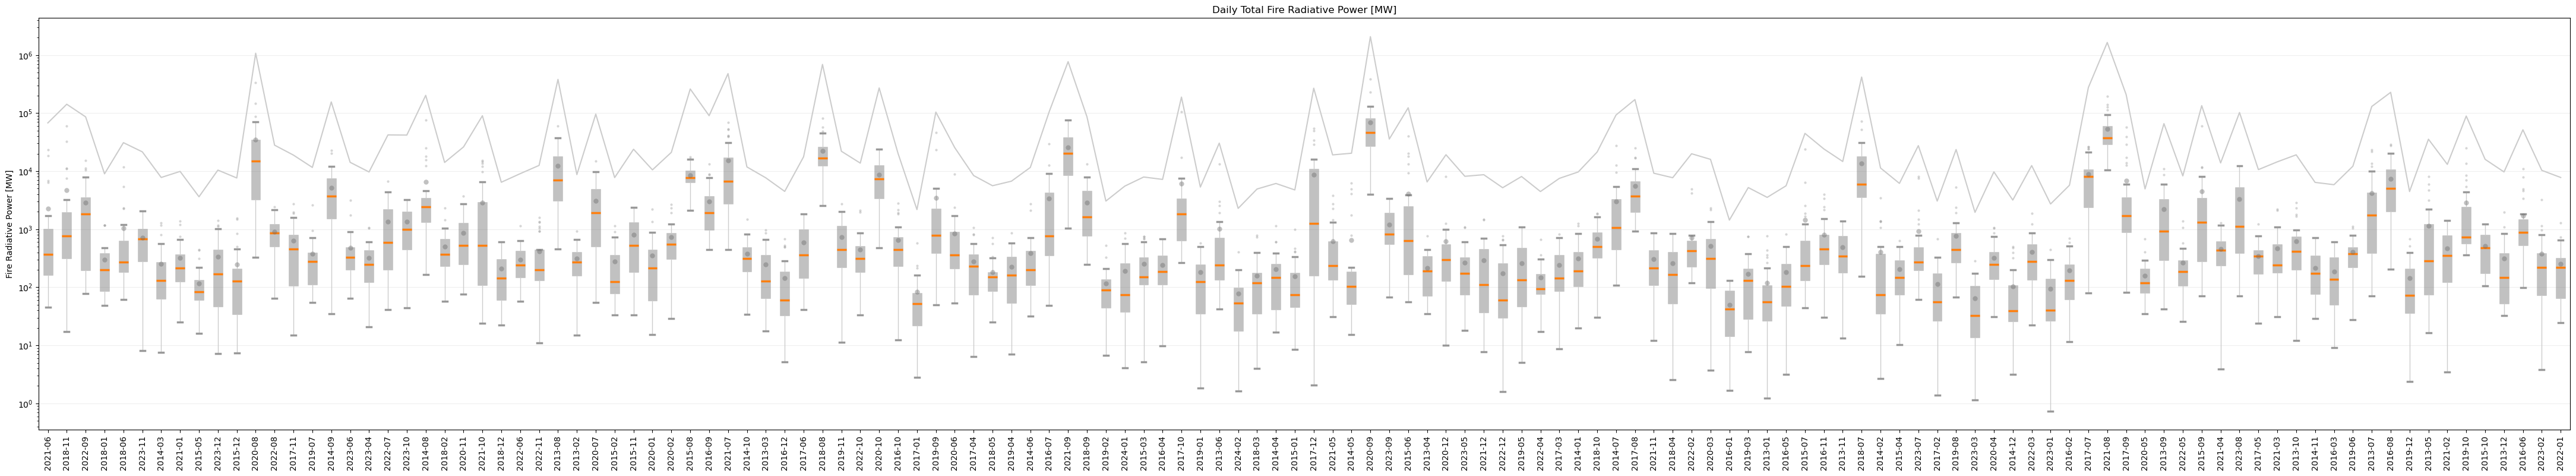

In [96]:
ax = dfd['frp'].boxplot(
    ylabel='Fire Radiative Power [MW]',
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(dfd['frp'].columns)+1)), dfd['frp'].sum().to_list(), '#ccc')
plt.title('Daily Total Fire Radiative Power [MW]')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/images/NASA-FIRMS_boxplot_power.png')
plt.show()

### Fire Area

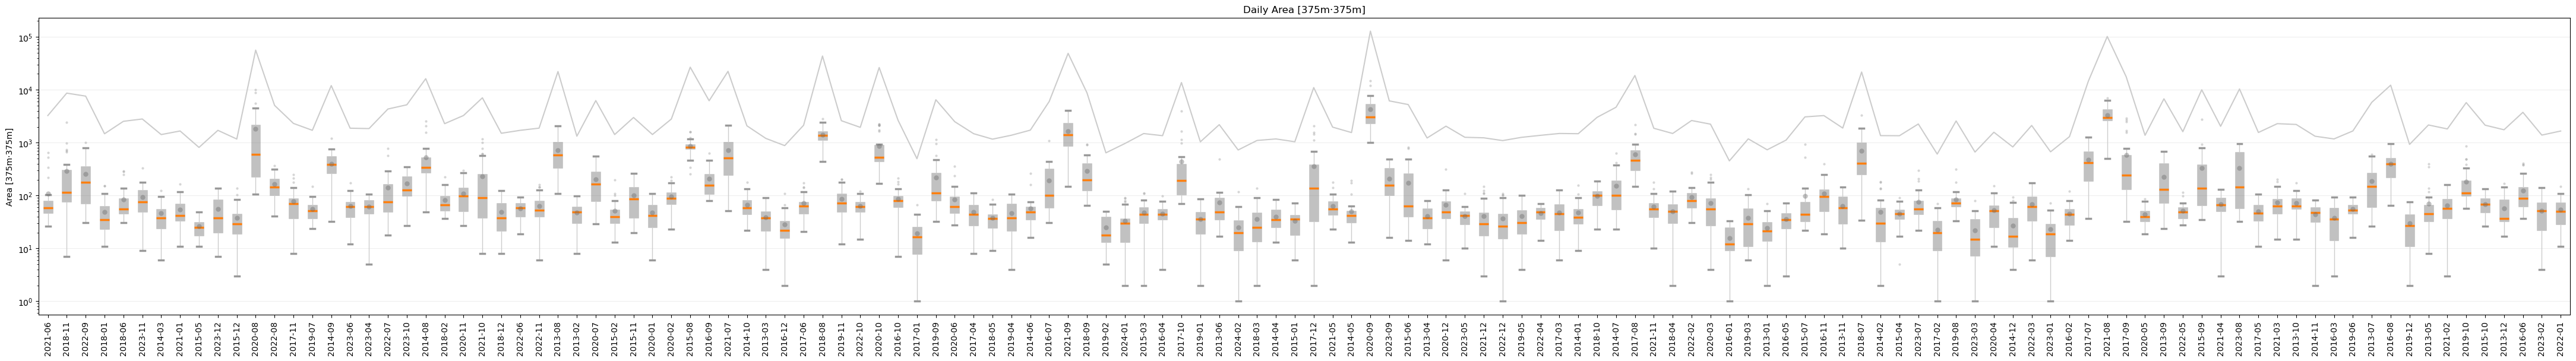

In [98]:
ax = dfd['cnt'].boxplot(
    ylabel='Area [375m·375m]',
    figsize=(55,6.5), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(dfd['frp'].columns)+1)), dfd['frp'].sum().to_list(), '#ccc')
plt.title('Daily Area [375m·375m]')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/images/NASA-FIRMS_boxplot_area.png')
plt.show()

### Fire Intensity

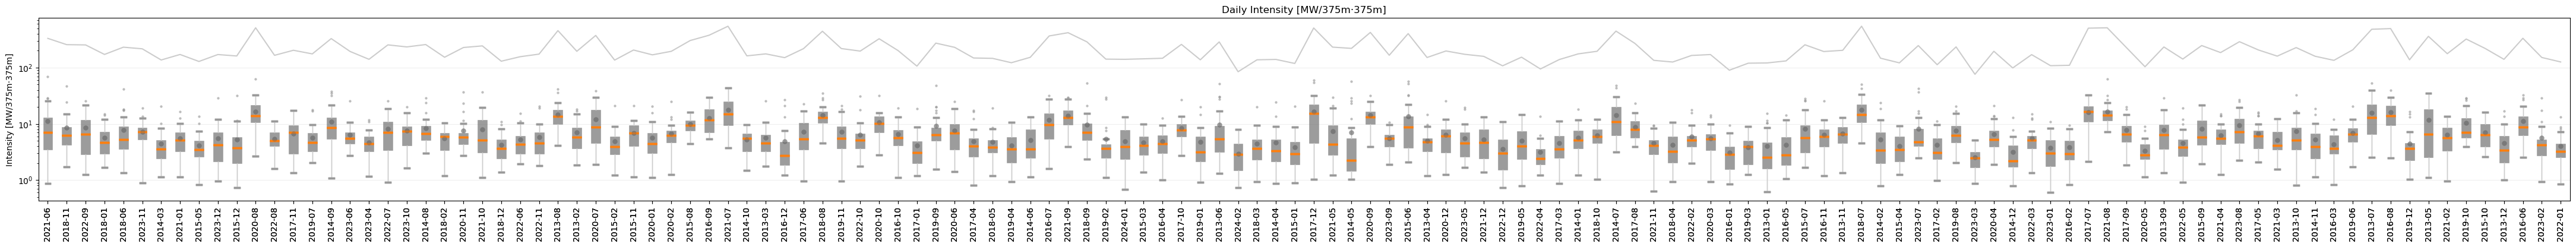

In [103]:
df2 = dfd['frp']/dfd['cnt']
ax = df2.boxplot(
    ylabel='Intensity [MW/375m·375m]',
    figsize=(55,4), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), 
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(df2.columns)+1)), df2.sum().to_list(), '#ccc')
plt.title('Daily Intensity [MW/375m·375m]')
plt.xticks(rotation='vertical')
# plt.ylim([0.5,5000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/images/NASA-FIRMS_boxplot_intensity.png')
plt.show()

### Combined Chart

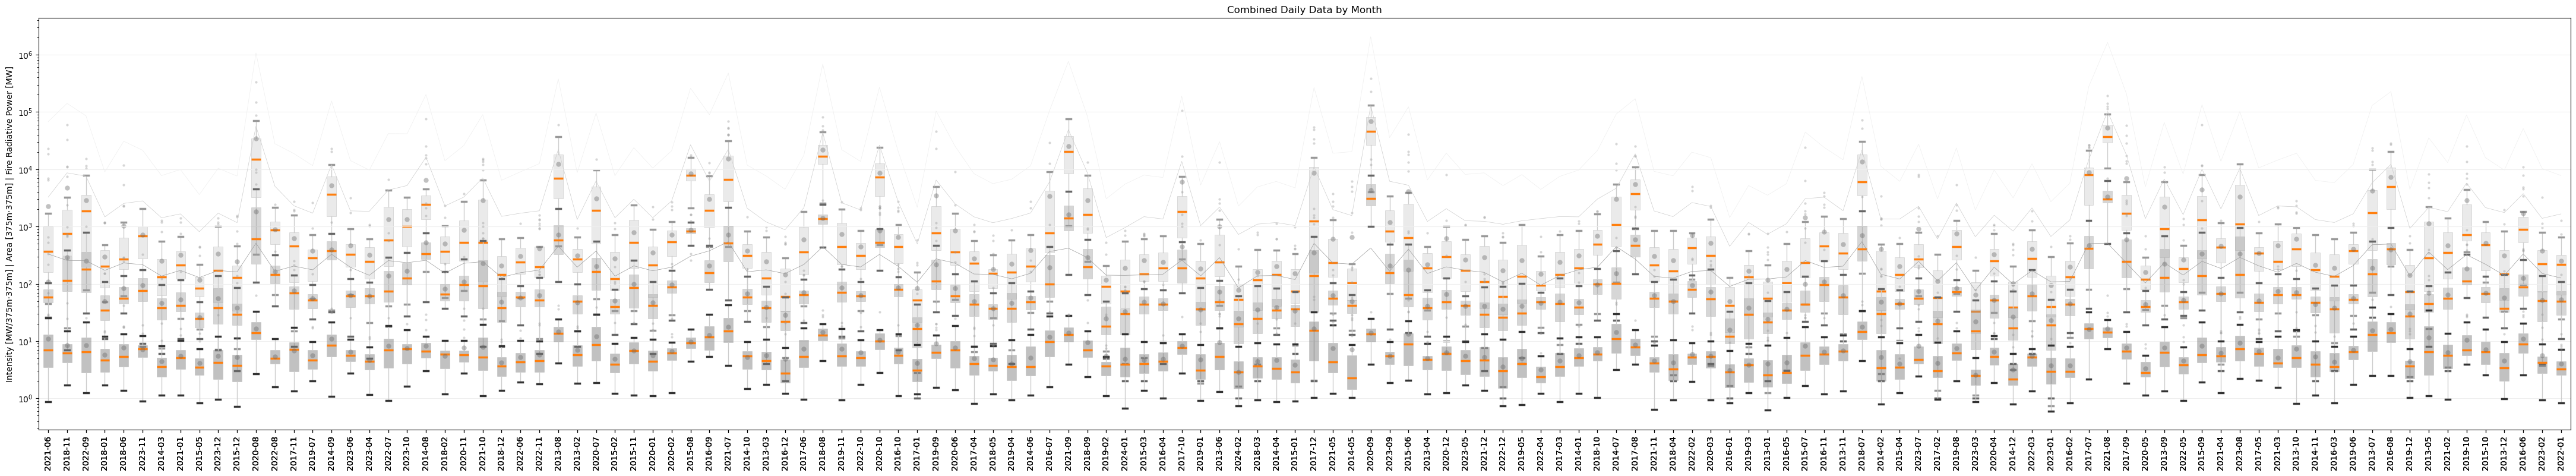

In [106]:
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#ccc", alpha=0.4)
capprops = dict(color="#999", linewidth = 2.5)
ax = dfd['frp'].boxplot(
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=1,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#999", alpha=0.4)
capprops = dict(color="#666", linewidth = 2.5)
dfd['cnt'].boxplot( ax =ax,
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=2,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#666", alpha=0.4)
capprops = dict(color="#333", linewidth = 2.5)
df2.boxplot( ax=ax,
    figsize=(55,9), grid=False, showmeans = True, patch_artist=True, color = dict(whiskers='#ccc'), zorder=3,
    boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, capprops=capprops, meanprops=meanprops)
ax.plot(list(range(1,len(dfd['frp'].columns)+1)),dfd['frp'].sum().to_list(), '#eee', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(dfd['cnt'].columns)+1)),dfd['cnt'].sum().to_list(), '#ccc', linewidth=0.5, zorder=4)
ax.plot(list(range(1,len(df2.columns)+1)), df2.sum().to_list(), '#999', linewidth=0.5, zorder=3)
plt.xticks(rotation='vertical')
plt.title('Combined Daily Data by Month')
plt.ylabel('Intensity [MW/375m·375m] | Area [375m·375m] | Fire Radiative Power [MW]')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/images/NASA-FIRMS_boxplot_combined.png')
plt.show()